In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

beam = nx.Beam()
beam.Unpolarized()

velocities = np.linspace(-10, 10, 512)

# define a measurement for each temperature

# there are common fit parameters as the isomer shift and the quadrupole splitting
# they should be the same for every measurement
# so we define them independently of the measurement

isomer_for_all = nx.Var(1, min = 0, max = 3, fit = True, id = "isomer")

quadrupole_for_all = nx.Var(0.8, min = 0, max = 2, fit = True, id = "quadrupole")


# the magnetic field and the Lamb-Mossbauer factor are sample specific and have to be defined for each measurement

# ---- iron experiment at temperature A ----

site_A = nx.Hyperfine(weight = 1,
                      isomer = isomer_for_all,
                      magnetic_field = nx.Var(33, min = 0, max = 40, fit = True, id = "magnetic field A"),
                      quadrupole = quadrupole_for_all,
                      isotropic = True)

mat_iron_A = nx.Material(composition = [["Fe", 1]],
                         density = 7.8,
                         isotope = nx.lib.moessbauer.Fe57,
                         abundance = 0.02119,
                         lamb_moessbauer = nx.Var(0.796, min = 0, max = 1, id = "Lamb Moessbauer A"),
                         hyperfine_sites = [site_A])

layer_iron_A = nx.Layer(thickness = 1000,
                        material = mat_iron_A)

sample_A = nx.Sample(layers = [layer_iron_A],
                     geometry = "f")

experiment_A = nx.Experiment(beam = beam,
                             objects = [sample_A],
                             isotope = nx.lib.moessbauer.Fe57)

moessbauer_spec_A = nx.MoessbauerSpectrum(experiment = experiment_A,
                                          velocity = velocities)

# ---- iron experiment at temperature B ----

site_B = nx.Hyperfine(weight = 1,
                      isomer = isomer_for_all,
                      magnetic_field = nx.Var(25, min = 0, max = 40, fit = True, id = "magnetic field B"),
                      quadrupole = quadrupole_for_all,
                      isotropic = True)

mat_iron_B = nx.Material(composition = [["Fe", 1]],
                         density = 7.8,
                         isotope = nx.lib.moessbauer.Fe57,
                         abundance = 0.02119,
                         lamb_moessbauer = nx.Var(0.73, min = 0, max = 1, id = "Lamb Moessbauer B"),
                         hyperfine_sites = [site_B])

layer_iron_B = nx.Layer(thickness = 1000,
                        material = mat_iron_B)

sample_B = nx.Sample(layers = [layer_iron_B],
                     geometry = "f")

experiment_B = nx.Experiment(beam = beam,
                             objects = [sample_B],
                             isotope = nx.lib.moessbauer.Fe57)

moessbauer_spec_B = nx.MoessbauerSpectrum(experiment = experiment_B,
                                          velocity = velocities)

# ---- iron experiment at temperature C ----

site_C = nx.Hyperfine(weight = 1,
                      isomer = isomer_for_all,
                      magnetic_field = nx.Var(12, min = 0, max = 40, fit = True, id = "magnetic field C"),
                      quadrupole = quadrupole_for_all,
                      isotropic = True)

mat_iron_C = nx.Material(composition = [["Fe", 1]],
                         density = 7.8,
                         isotope = nx.lib.moessbauer.Fe57,
                         abundance = 0.02119,
                         lamb_moessbauer = nx.Var(0.6, min = 0, max = 1, id = "Lamb Moessbauer C"),
                         hyperfine_sites = [site_C])

layer_iron_C = nx.Layer(thickness = 1000,
                        material = mat_iron_C)

sample_C = nx.Sample(layers = [layer_iron_C],
                     geometry = "f")

experiment_C = nx.Experiment(beam = beam,
                             objects = [sample_C],
                             isotope = nx.lib.moessbauer.Fe57)

moessbauer_spec_C = nx.MoessbauerSpectrum(experiment = experiment_C,
                                          velocity = velocities)


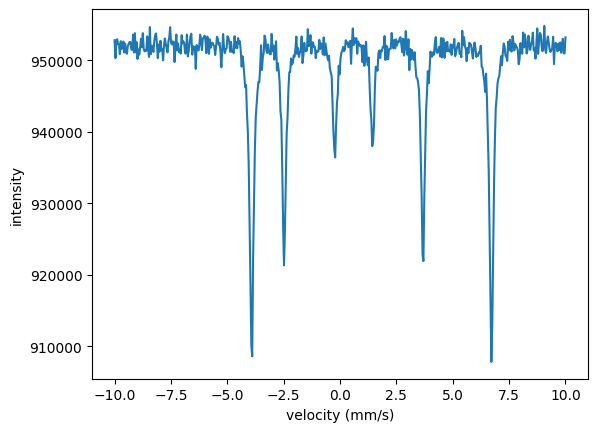

In [2]:
int_A = moessbauer_spec_A()

int_A = np.random.poisson(int_A * 1e6)

plt.plot(velocities, int_A)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

nx.data.Save("spectrum_A.txt", [velocities, int_A])

In [3]:
int_B = moessbauer_spec_B()

int_B = np.random.poisson(int_B * 1e6)

plt.plot(velocities, int_B)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

nx.data.Save("spectrum_B.txt", [velocities, int_B])

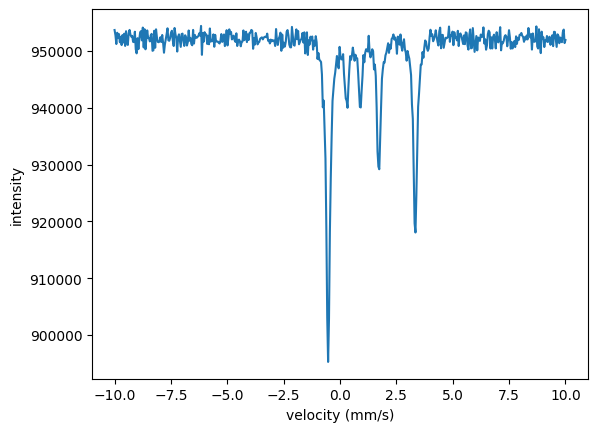

In [4]:
int_C = moessbauer_spec_C()

int_C = np.random.poisson(int_C * 1e6)

plt.plot(velocities, int_C)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

nx.data.Save("spectrum_C.txt", [velocities, int_C])